In [24]:
from os.path import dirname, join as pjoin
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import json
from pathlib import Path

**Load label data from label studio json file.**

In [25]:
path = Path(f'..\data\\raw\\self-collected\\label-raw-data.json')

raw_json_file = open(path)
raw_json_data = json.load(raw_json_file)

In [26]:
raw_json_data

[{'id': 46018974,
  'annotations': [{'id': 17129655,
    'completed_by': 7565,
    'result': [{'id': '-aswm52Cvn',
      'type': 'polygonlabels',
      'value': {'closed': True,
       'points': [[16.63569595809076, 0.07232672561391029],
        [21.779007955785104, -1.80411241501588e-15],
        [39.81417574854427, 73.95563658682308],
        [36.5006809196294, 74.24279527454848],
        [26.635922109227177, 38.79921912597916]],
       'polygonlabels': ['mast']},
      'origin': 'manual',
      'to_name': 'image',
      'from_name': 'label',
      'image_rotation': 0,
      'original_width': 1500,
      'original_height': 2250},
     {'id': 'J1WppUIQ4I',
      'type': 'polygonlabels',
      'value': {'closed': True,
       'points': [[40.64163344564539, 0],
        [44.96322400926324, 0],
        [52.264361094818, 61.346213634345446],
        [49.60142256085124, 62.726996577883774],
        [48.51652167664257, 62.46399030292409]],
       'polygonlabels': ['mast']},
      'origin': '

In [27]:

def conv(result):
    '''
    Convert the result to pixels.
    Based of function in label studio manual export documentation.
    @return [[x1, y1], [x2, y2], ...]
    '''
    if not ('original_width' in result or 'original_height' in result):
        return None
    value = result['value']
    w, h = result['original_width'], result['original_height']
    if not all([key in value for key in ['points', 'polygonlabels']]):
        return None
    points = value['points']
    pixels = []
    for point in points:
        pixels.append([w * point[0] / 100, h * point[1] / 100])
    return pixels


In [44]:
mast1 = conv(raw_json_data[0]['annotations'][0]['result'][0])
mast1.append(mast1[0])
mast2 = conv(raw_json_data[0]['annotations'][0]['result'][1])
mast2.append(mast2[0])

powerline = conv(raw_json_data[0]['annotations'][0]['result'][2])
powerline.append(powerline[0])


Add all labels from json data into 1 figure.<br>
When ploting labels origin is in the upperleft instead of the classical lowerleft

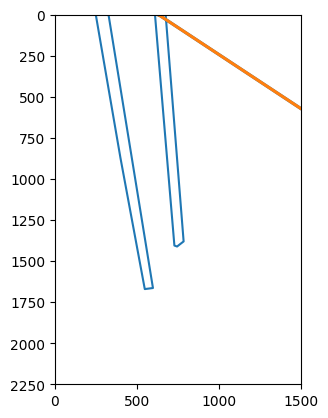

In [75]:
xs, ys = zip(*mast1)
xs1, ys1 = zip(*mast2)
xs2, ys2 = zip(*powerline)
xs, ys  = xs + xs1 + xs2, ys + ys1 + ys2

plt.figure()
plt.plot(xs, ys)
plt.plot(xs2, ys2)
plt.xlim(0, raw_json_data[0]['annotations'][0]['result'][0]['original_width'])
plt.ylim(0, raw_json_data[0]['annotations'][0]['result'][0]['original_height'])
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()

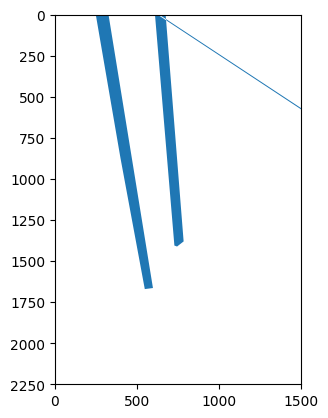

In [67]:
plt.fill(xs, ys)
plt.xlim(0, raw_json_data[0]['annotations'][0]['result'][0]['original_width'])
plt.ylim(0, raw_json_data[0]['annotations'][0]['result'][0]['original_height'])
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()

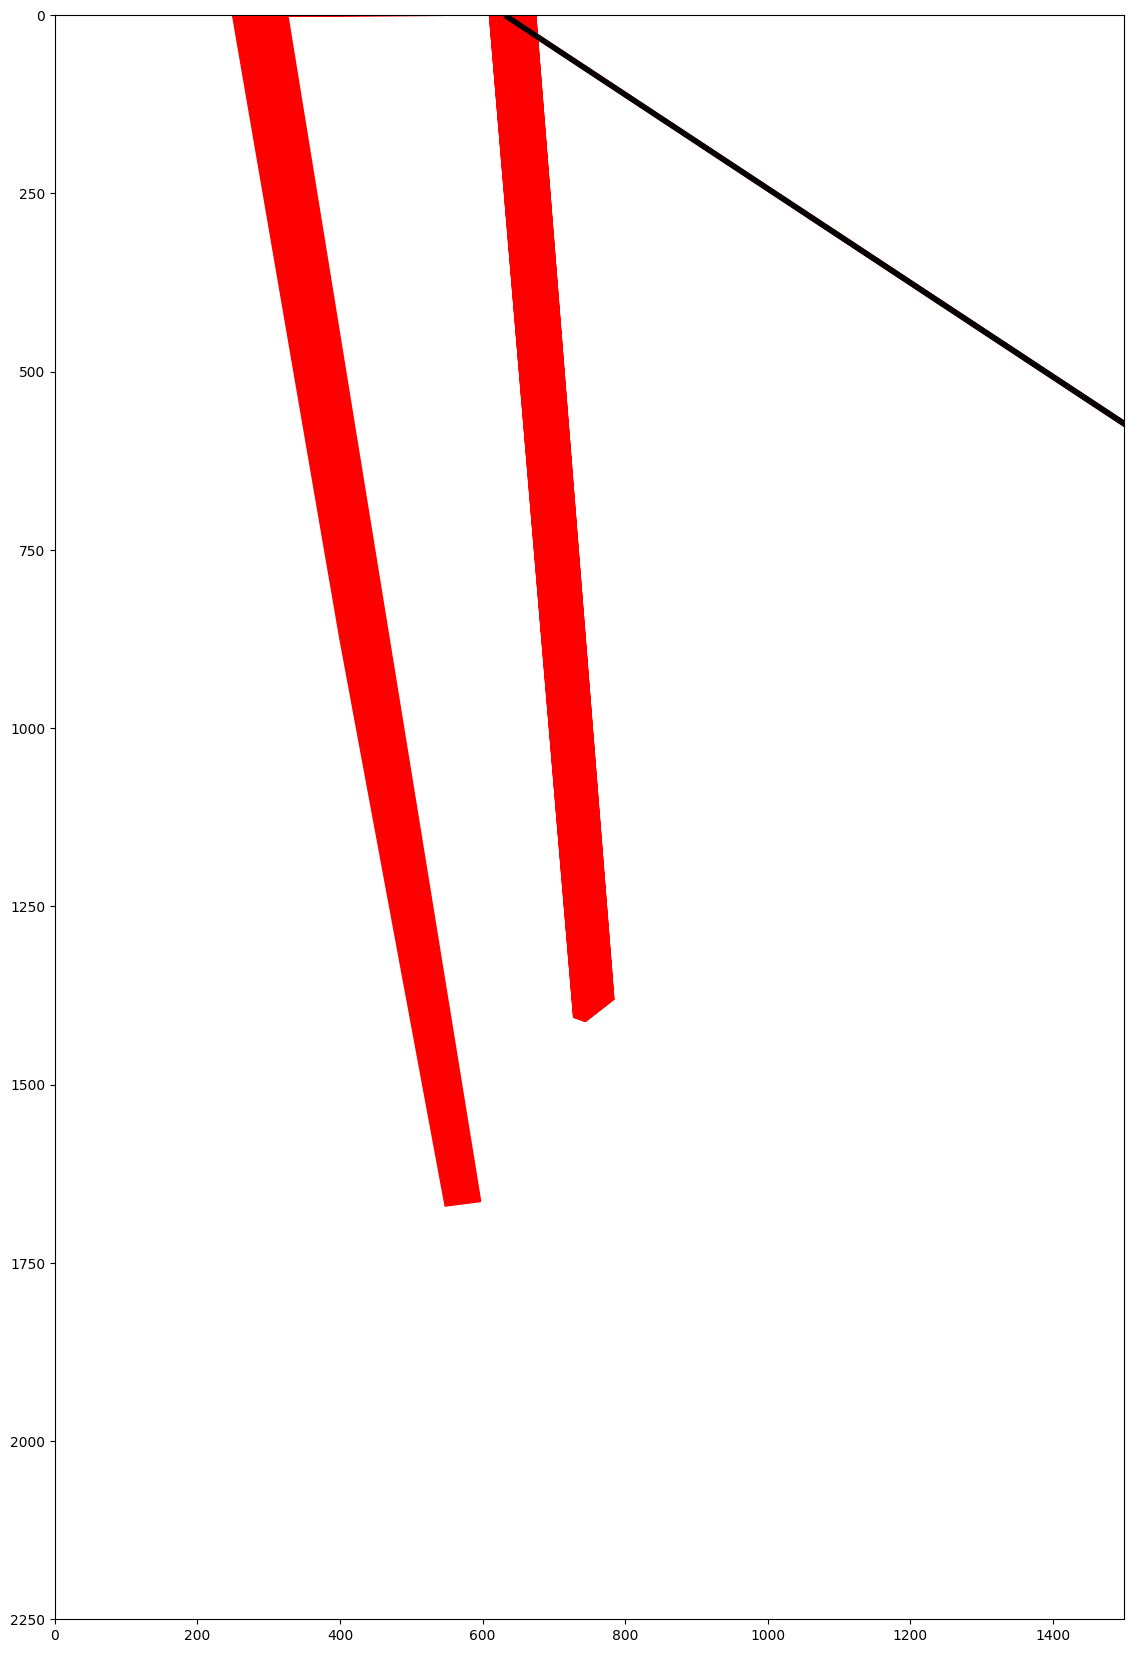

In [84]:
xm, ym = xs + xs1, ys + ys1
plt.figure(figsize=((2250/72), (1500/72)))
plt.fill(xm, ym, color='red')
plt.fill(xs2, ys2, color='black')
plt.xlim(0, raw_json_data[0]['annotations'][0]['result'][0]['original_width'])
plt.ylim(0, raw_json_data[0]['annotations'][0]['result'][0]['original_height'])
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()